# Probabilistic Numerical Methods

Probabilistic numerical methods solve numerical tasks by treating them as problems of statistical inference. This approach captures uncertainty arising from finite computational resources and from stochastic input.

In order to illustrate what PN methods are and how they work consider the following deliberately simple numerical problem.

In [1]:
# Make inline plots vector graphics instead of raster graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Plotting
import matplotlib.pyplot as plt
plt.style.use('../probnum.mplstyle')

## 1D Noisy Quadratic Optimization

Suppose we are trying to find the optimum of a one-dimensional quadratic function $$y = f(x) = a x^2 + bx + c.$$ 

In [2]:
import numpy as np
import probnum as pn

# Quadratic objective function
a = 1.5
b = -2.0
c = 3.0
x_opt = -b / (2 * a)

def f(x):
    return a * x ** 2 + b * x + c

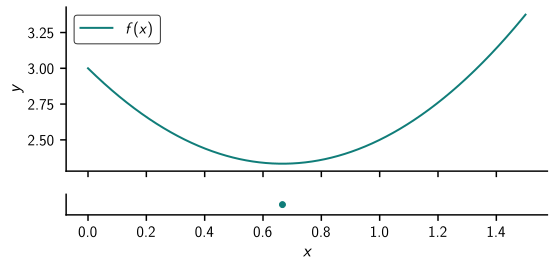

In [4]:
# Plot true objective
xx = np.linspace(0, 1.5, 1000)

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 4), sharex=True, gridspec_kw={'height_ratios': [8, 1]})
axes[0].plot(xx, f(xx), label="$f(x)$")
axes[1].scatter(x_opt, 0)
axes[1].get_yaxis().set_visible(False)
# axes[1].spines["left"].set_visible(False)
axes[0].set_ylabel("$y$")
axes[1].set_xlabel("$x$")
axes[0].legend()
plt.tight_layout()
plt.show()

However, we don't have access to the true coefficients $a, b$ and $c$, but only to noisy evaluations $$\hat{y} = \hat{f}(x) = (a+\varepsilon_a)x^2 + (b+\varepsilon_b)x + \varepsilon_c + c$$  objective function $f$ at $x$, where $\varepsilon = (\varepsilon_a, \varepsilon_b, \varepsilon_c) \sim \mathcal{N}(0, \Sigma)$.

*Remark*: The $n$-dimensional analogue of this case arises for example in supervised learning. In large-scale empirical risk minimization the available training data often does not fit into (local) memory, so during optimization only batches of data are considered inducing noise. Here $\hat{f}$ would correspond to the empirical risk on the current batch.

In [5]:
from probnum.prob import RandomVariable, Normal

# Random seed
np.random.seed(1)

# Noisy objective function
Sigma = np.diag([0.02, 0.05, 0.05])
eps = RandomVariable(distribution=Normal(np.zeros(3), Sigma))

def f_hat(x, noise=eps.sample(1)):
    return (a + noise[0]) * x ** 2 + (b + noise[1]) * x + c + noise[2]

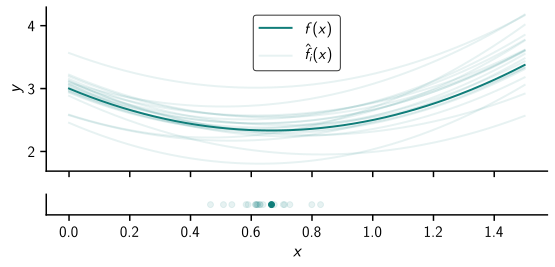

In [8]:
# Plot objective and noisy evaluations
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 4), sharex=True, gridspec_kw={'height_ratios': [8, 1]})
axes[0].plot(xx, f(xx), label="$f(x)$")
axes[1].scatter(x_opt, 0)
for i in range(20):
    noise = eps.sample(1)
    x_opt_noise = -(b + noise[1]) / (2 * (a + noise[0]))
    if i == 0:
        sample_label = "$\\hat{f}_i(x)$"
    else:
        sample_label = None
    axes[0].plot(xx, f_hat(xx, noise), color="C0", alpha=0.1, label=sample_label)
    axes[1].scatter(x_opt_noise, 0, color="C0", alpha=0.1)
axes[1].get_yaxis().set_visible(False)
# axes[1].spines["left"].set_visible(False)
axes[0].set_ylabel("$y$")
axes[1].set_xlabel("$x$")
axes[0].legend()
plt.tight_layout()
plt.show()

## A Simple Probabilistic Numerical Method

A naive strategy to solve the problem given only the ability to evaluate the noisy function $\hat{f}$ could be to simply choose random points on the real axis and return the point of lowest observed function value. However, clearly this is suboptimal in a number of ways.

Suppose we have some idea of where the minimum of the function $f$ lies or an idea about what coefficients of the quadratic function are likely. This could come from experience, a physical application from which the problem arises or related optimization problems we have solved in the past. Then we should evaluate closer to where we belief the  optimum is.



We would like to use this prior information to solve the optimization problem in question. In order to do so we need to collect information about the problem, which we do by evaluating $\hat{f}$ at chosen points $x$. The decision of where to evaluate is called a _policy_. 

We now want to design a _probabilistic numerical method_ to solve the above problem. 

Given the noise model we can compute the distribution of the random variable $f(x)$ for a given evaluation point $x$ using the properties of Gaussians $$\hat{y} \sim \mathcal{N}\bigg(f(x), \begin{pmatrix}x^2 & x & 1 \end{pmatrix}\Sigma \begin{pmatrix}x^2 \\ x\\1 \end{pmatrix}\bigg).$$

### Policy

### Action and Observation

### Inference Step

### Stopping Criteria

## Outlook

- Probabilistic Linear Solver
- Bayesian Optimization
- Quadrature


- Development Tutorial